### **Analisis exploratorio de datos**

In [71]:
# Se importan las librerias necesarias para trabajar
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [72]:
# Se concatenan los dos archivos csv, para trabajar con un set de datos.
df1 = pd.read_csv('str_1.csv', delimiter=";")
df2 = pd.read_csv('str_2.csv', delimiter=";")
df = pd.concat([df1, df2])

In [73]:
# Visualizamos la dimension del dataframe
df.shape

(9537, 11)

In [74]:
# Los primeros 5 registros
df.head()

,ID,protocol,browser_type,login_attempts,duration,packet_size,encryption_used,ip_reputation_score,failed_logins,unusual_time_access,attack
0,0,TCP,Edge,4.0,492.983263,599,DES,0.606818,1,0,Y
1,1,TCP,Firefox,3.0,1557.996461,472,DES,0.301569,0,0,N
2,2,TCP,Chrome,3.0,75.044262,629,DES,0.739164,2,0,Y
3,3,UDP,Unknown,4.0,601.248835,804,DES,0.123267,0,0,Y
4,4,TCP,Firefox,5.0,532.540888,453,AES,0.054874,1,0,N


In [75]:
# Todas las columnas del dataframe
df.columns

Index(['ID', 'protocol', 'browser_type', 'login_attempts', 'duration',
       'packet_size', 'encryption_used', 'ip_reputation_score',
       'failed_logins', 'unusual_time_access', 'attack'],
      dtype='object')

In [76]:
# Tipo de datos de cada columna y valores faltantes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9537 entries, 0 to 7426
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   9537 non-null   int64  
 1   protocol             9537 non-null   object 
 2   browser_type         9537 non-null   object 
 3   login_attempts       9409 non-null   float64
 4   duration             9537 non-null   float64
 5   packet_size          9537 non-null   int64  
 6   encryption_used      7571 non-null   object 
 7   ip_reputation_score  9537 non-null   float64
 8   failed_logins        9537 non-null   int64  
 9   unusual_time_access  9537 non-null   int64  
 10  attack               9537 non-null   object 
dtypes: float64(3), int64(4), object(4)
memory usage: 894.1+ KB


In [77]:
# Medidas estadisticas de todas las columnas
df.describe(include='all')

,ID,protocol,browser_type,login_attempts,duration,packet_size,encryption_used,ip_reputation_score,failed_logins,unusual_time_access,attack
count,9537.000000,9537,9537,9409.000000,9537.000000,9537.000000,7571,9537.000000,9537.000000,9537.000000,9537
unique,NaN,3,5,NaN,NaN,NaN,2,NaN,NaN,NaN,2
top,NaN,TCP,Chrome,NaN,NaN,NaN,AES,NaN,NaN,NaN,N
freq,NaN,6624,5137,NaN,NaN,NaN,4706,NaN,NaN,NaN,5273
mean,3124.823949,NaN,NaN,4.029971,792.745312,500.430639,NaN,0.331338,1.517773,0.149942,NaN
std,2209.075559,NaN,NaN,1.962595,786.560144,198.379364,NaN,0.177175,1.033988,0.357034,NaN
min,0.000000,NaN,NaN,1.000000,0.500000,64.000000,NaN,0.002497,0.000000,0.000000,NaN
25%,1192.000000,NaN,NaN,3.000000,231.953006,365.000000,NaN,0.191946,1.000000,0.000000,NaN
50%,2658.000000,NaN,NaN,4.000000,556.277457,499.000000,NaN,0.314778,1.000000,0.000000,NaN
75%,5042.000000,NaN,NaN,5.000000,1105.380602,635.000000,NaN,0.453388,2.000000,0.000000,NaN


Separamos los datos en dos conjuntos, el de ataques y el de no ataques.

In [78]:
filtro_ataques = df[df['attack'] =='Y']
encriptacion_ataques = filtro_ataques["encryption_used"].fillna("ND")
filtro_n_ataques = df[df['attack'] =='N']
encriptacion_n_ataques = filtro_n_ataques["encryption_used"].fillna("ND")

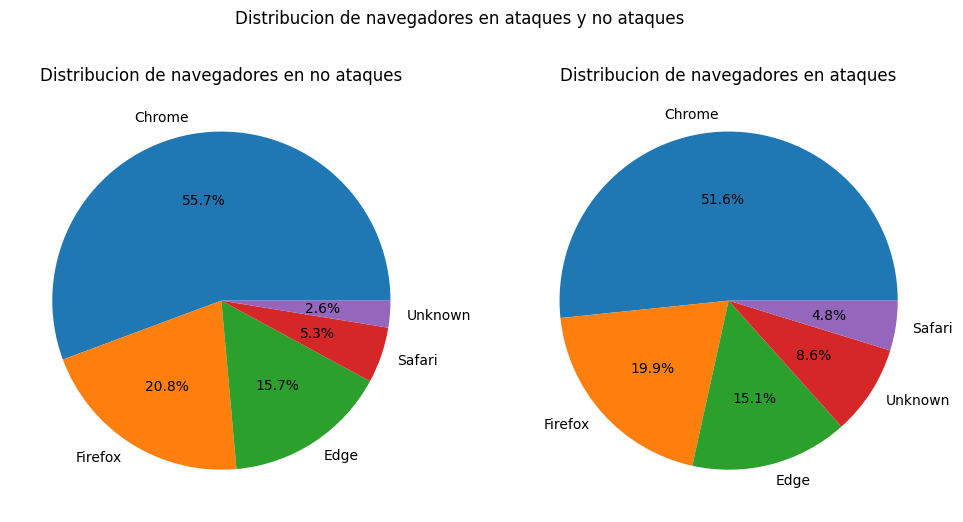

In [79]:
# Pie chart de los navegadores usados en ataques y no ataques

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Distribucion de navegadores en ataques y no ataques')

ax[0].set_title('Distribucion de navegadores en no ataques')
ax[0].pie(filtro_n_ataques['browser_type'].value_counts(), labels=filtro_n_ataques['browser_type'].value_counts().index, autopct='%1.1f%%')
ax[1].set_title('Distribucion de navegadores en ataques')
ax[1].pie(filtro_ataques['browser_type'].value_counts(), labels=filtro_ataques['browser_type'].value_counts().index, autopct='%1.1f%%')

plt.show()

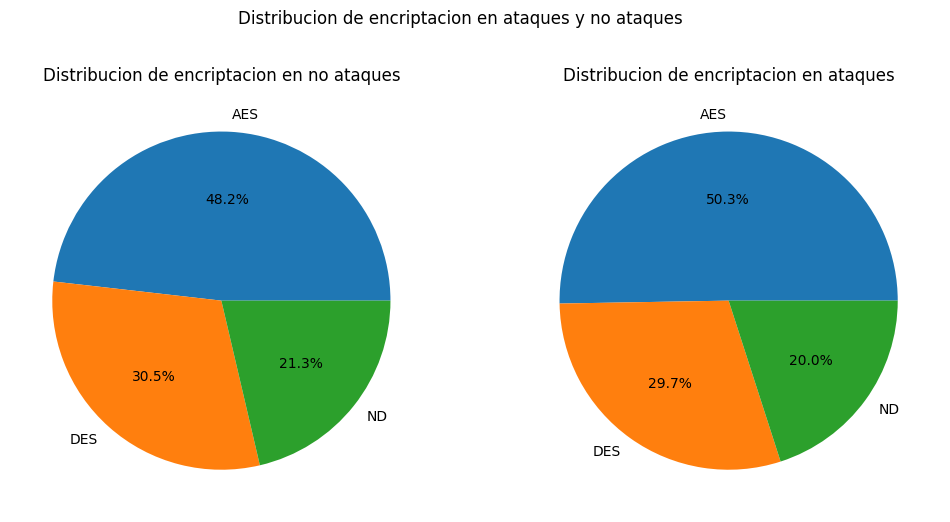

In [80]:
# Pie chart de la ecriptacion usada en ataques y no ataques

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Distribucion de encriptacion en ataques y no ataques')

ax[0].set_title('Distribucion de encriptacion en no ataques')
ax[0].pie(encriptacion_ataques.value_counts(), labels=encriptacion_ataques.value_counts().index, autopct='%1.1f%%')
ax[1].set_title('Distribucion de encriptacion en ataques')
ax[1].pie(encriptacion_n_ataques.value_counts(), labels=encriptacion_n_ataques.value_counts().index, autopct='%1.1f%%')

plt.show()

In [81]:
filtro_ataques.describe(include="all")

,ID,protocol,browser_type,login_attempts,duration,packet_size,encryption_used,ip_reputation_score,failed_logins,unusual_time_access,attack
count,4264.000000,4264,4264,4209.000000,4264.000000,4264.000000,3354,4264.000000,4264.000000,4264.000000,4264
unique,NaN,3,5,NaN,NaN,NaN,2,NaN,NaN,NaN,1
top,NaN,TCP,Chrome,NaN,NaN,NaN,AES,NaN,NaN,NaN,Y
freq,NaN,2963,2202,NaN,NaN,NaN,2055,NaN,NaN,NaN,4264
mean,3112.113743,NaN,NaN,4.633642,829.131980,498.931051,NaN,0.373015,1.935976,0.153377,NaN
std,2226.813841,NaN,NaN,2.268936,851.857703,199.308695,NaN,0.200488,1.184932,0.360393,NaN
min,0.000000,NaN,NaN,1.000000,0.500000,64.000000,NaN,0.002497,0.000000,0.000000,NaN
25%,1159.000000,NaN,NaN,3.000000,231.664142,361.000000,NaN,0.211048,1.000000,0.000000,NaN
50%,2630.500000,NaN,NaN,4.000000,559.358924,500.000000,NaN,0.347314,2.000000,0.000000,NaN
75%,5029.250000,NaN,NaN,6.000000,1166.808449,635.250000,NaN,0.525693,3.000000,0.000000,NaN


In [82]:
filtro_n_ataques.describe(include="all")

,ID,protocol,browser_type,login_attempts,duration,packet_size,encryption_used,ip_reputation_score,failed_logins,unusual_time_access,attack
count,5273.000000,5273,5273,5200.000000,5273.000000,5273.000000,4217,5273.000000,5273.000000,5273.000000,5273
unique,NaN,3,5,NaN,NaN,NaN,2,NaN,NaN,NaN,1
top,NaN,TCP,Chrome,NaN,NaN,NaN,AES,NaN,NaN,NaN,N
freq,NaN,3661,2935,NaN,NaN,NaN,2651,NaN,NaN,NaN,5273
mean,3135.102029,NaN,NaN,3.541346,763.321311,501.643277,NaN,0.297636,1.179594,0.147165,NaN
std,2194.784387,NaN,NaN,1.506485,728.250219,197.635263,NaN,0.147434,0.736657,0.354304,NaN
min,1.000000,NaN,NaN,1.000000,0.500000,64.000000,NaN,0.007030,0.000000,0.000000,NaN
25%,1227.000000,NaN,NaN,2.000000,232.042818,368.000000,NaN,0.177466,1.000000,0.000000,NaN
50%,2674.000000,NaN,NaN,4.000000,554.069552,498.000000,NaN,0.293780,1.000000,0.000000,NaN
75%,5057.000000,NaN,NaN,5.000000,1066.236472,634.000000,NaN,0.412074,2.000000,0.000000,NaN


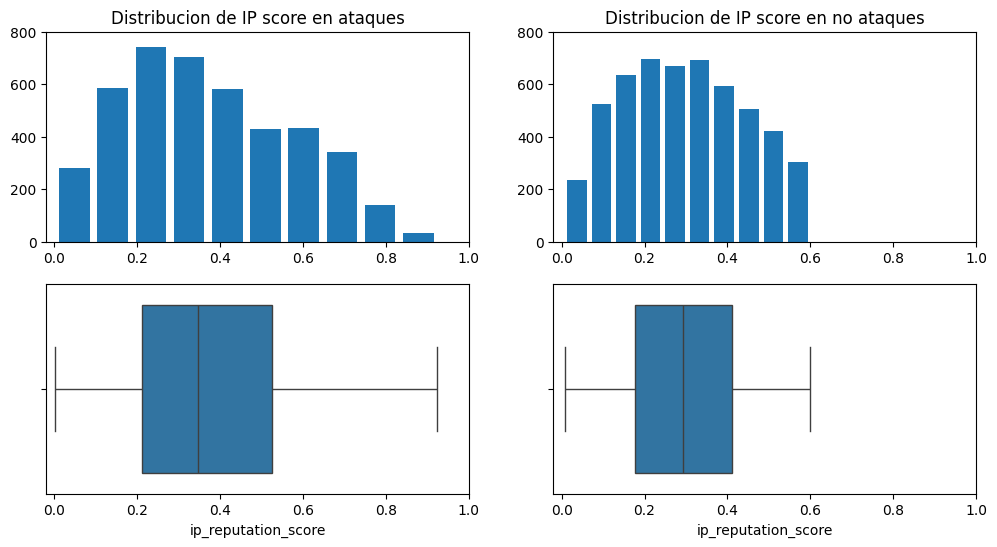

In [83]:
# Distribucion de IP score en ataques y no ataques

INF_X = -0.02
INF_Y = 0
SUP_X = 1
SUP_Y = 800
fig, ax = plt.subplots(2, 2, figsize=(12, 6))
fig.suptitle('')

ax[0,0].set_ylim(INF_Y, SUP_Y)
ax[0,0].set_xlim(INF_X,  SUP_X)
ax[0,0].set_title('Distribucion de IP score en ataques')
ax[0,0].hist(filtro_ataques['ip_reputation_score'], bins=10, alpha=1, label='Ataques', rwidth=0.8)
ax[0,1].set_ylim(INF_Y, SUP_Y)
ax[0,1].set_xlim(INF_X,  SUP_X)
ax[0,1].set_title('Distribucion de IP score en no ataques')
ax[0,1].hist(filtro_n_ataques['ip_reputation_score'], bins=10, alpha=1, label='No ataques', rwidth=0.8)

sns.boxplot(x = filtro_ataques["ip_reputation_score"], ax=ax[1,0])
ax[1,0].set_xlim(INF_X,  SUP_X)
sns.boxplot(x = filtro_n_ataques["ip_reputation_score"], ax=ax[1,1])
ax[1,1].set_xlim(INF_X, SUP_X)

plt.show()

In [84]:
# Medidas estadisticas de IP score en ataques y no ataques

print("\t\tAtaque\t\t\t\tNo ataque")
print("Mediana \t", filtro_ataques["ip_reputation_score"].median(), "\t\t", filtro_n_ataques["ip_reputation_score"].median())
print("Media \t\t", filtro_ataques["ip_reputation_score"].mean(), "\t\t", filtro_n_ataques["ip_reputation_score"].mean())
print("Desviacion \t", filtro_ataques["ip_reputation_score"].std(), "\t\t", filtro_n_ataques["ip_reputation_score"].std())
print("Rango \t\t", filtro_ataques["ip_reputation_score"].max() - filtro_ataques["ip_reputation_score"].min(),
       "\t\t", filtro_n_ataques["ip_reputation_score"].max() - filtro_n_ataques["ip_reputation_score"].min())

		Ataque				No ataque
Mediana 	 0.3473143610523912 		 0.2937802757454712
Media 		 0.373014583069066 		 0.2976363214549331
Desviacion 	 0.2004877097690357 		 0.14743372815608502
Rango 		 0.9218023587889803 		 0.5926727313993998


### **Preprocesado de conjunto de datos**

In [85]:
# Se elimina la columna ID, ya que no es necesaria para el analisis
df_original = df.copy()
df.drop('ID', axis=1, inplace=True)

Existen dos columnas con datos faltantes, login_attempts y encryption_used, que deben completarse.

In [86]:
# Visualizamos la cantidad de valores nulos
df.isnull().sum()

protocol                  0
browser_type              0
login_attempts          128
duration                  0
packet_size               0
encryption_used        1966
ip_reputation_score       0
failed_logins             0
unusual_time_access       0
attack                    0
dtype: int64

In [87]:
# Traemos los registros que tienen valores nulos en login attempts
df.loc[pd.isnull(df.login_attempts)]

,protocol,browser_type,login_attempts,duration,packet_size,encryption_used,ip_reputation_score,failed_logins,unusual_time_access,attack
78,UDP,Chrome,NaN,195.410180,518,AES,0.447209,0,0,Y
97,TCP,Firefox,NaN,33.652804,552,AES,0.311972,0,0,N
126,TCP,Firefox,NaN,183.719758,301,AES,0.263931,2,0,N
132,TCP,Chrome,NaN,102.388924,287,NaN,0.063839,1,0,Y
155,TCP,Edge,NaN,72.910813,357,DES,0.199537,2,0,Y
...,...,...,...,...,...,...,...,...,...,...
6910,TCP,Edge,NaN,640.488738,537,DES,0.674310,3,0,Y
6911,UDP,Edge,NaN,1456.765115,821,AES,0.427167,1,1,N
6934,TCP,Firefox,NaN,22.106746,439,AES,0.809237,2,0,Y
7054,TCP,Unknown,NaN,898.844146,687,NaN,0.137867,0,0,N


Los datos faltantes de login_attempts se completan con la mediana de los datos existentes.

In [88]:
# Llenamos los registros con valores nulos en login attempts con la mediana de los registros que no tienen valores nulos

df.loc[pd.isnull(df.login_attempts), 'login_attempts'] = df[pd.notnull(df.login_attempts)]['login_attempts'].median()

In [89]:
# Nuevamente se ven los valores nulos de las columnas
df.isnull().sum()

protocol                  0
browser_type              0
login_attempts            0
duration                  0
packet_size               0
encryption_used        1966
ip_reputation_score       0
failed_logins             0
unusual_time_access       0
attack                    0
dtype: int64

En el caso de los datos de encryption_used, los valores posibles son 'AES' y 'DES'. Para completar los datos faltantes calculamos cual es la proporcion de cada clase en los datos existentes.
Luego completaremos los faltantes de forma que mantengan esta proporcion.

In [90]:
df_notnull_encrypt = df.loc[pd.notnull(df.encryption_used)]
conteo_aes = df_notnull_encrypt.loc[df_notnull_encrypt.encryption_used == 'AES'].count()
conteo_des = df_notnull_encrypt.loc[df_notnull_encrypt.encryption_used == 'DES'].count()
conteo_total = df_notnull_encrypt.shape[0]

porcentaje_aes = (conteo_aes['encryption_used']/conteo_total)
porcentaje_des = (conteo_des['encryption_used']/conteo_total)

print('Conteo de encriptaciones: AES: ', conteo_aes['encryption_used'], ' DES: ', conteo_des['encryption_used'], 'Total: ', conteo_total)
print('Porentaje de ecriptaciones: AES: ', porcentaje_aes*100, ' DES: ', porcentaje_des*100)

Conteo de encriptaciones: AES:  4706  DES:  2865 Total:  7571
Porentaje de ecriptaciones: AES:  62.1582353718135  DES:  37.8417646281865


In [91]:
# Se reemplazan los valores nulos por los valores de encriptacion, segun probabilidad

indices = df.loc[pd.isnull(df.encryption_used)].index

for index, row in df.iterrows():
    if pd.isnull(row['encryption_used']):
        random = np.random.rand()
        if random > porcentaje_aes:
            df.at[index, 'encryption_used'] = 'DES'
        else:
            df.at[index, 'encryption_used'] = 'AES'



Volvemos a calcular el porcentaje de cada clase para comprobar que se mantuvo la proporcion.
Se nota una ligera diferencia, despreciable, debido a que no se puede mantener una proporcion exacta.

In [92]:
conteo_aes = df.loc[df.encryption_used == 'AES'].count()
conteo_des = df.loc[df.encryption_used == 'DES'].count()
conteo_total = df.shape[0]

porcentaje_aes = (conteo_aes['encryption_used']/conteo_total)
porcentaje_des = (conteo_des['encryption_used']/conteo_total)

print('Conteo de encriptaciones: AES: ', conteo_aes['encryption_used'], ' DES: ', conteo_des['encryption_used'], 'Total: ', conteo_total)
print('Porentaje de ecriptaciones: AES: ', porcentaje_aes*100, ' DES: ', porcentaje_des*100)

Conteo de encriptaciones: AES:  5891  DES:  3646 Total:  9537
Porentaje de ecriptaciones: AES:  61.7699486211597  DES:  38.23005137884031


In [93]:
# Se verifica que no existen mas los valores nulos
df.isnull().sum()

protocol               0
browser_type           0
login_attempts         0
duration               0
packet_size            0
encryption_used        0
ip_reputation_score    0
failed_logins          0
unusual_time_access    0
attack                 0
dtype: int64

<Axes: >

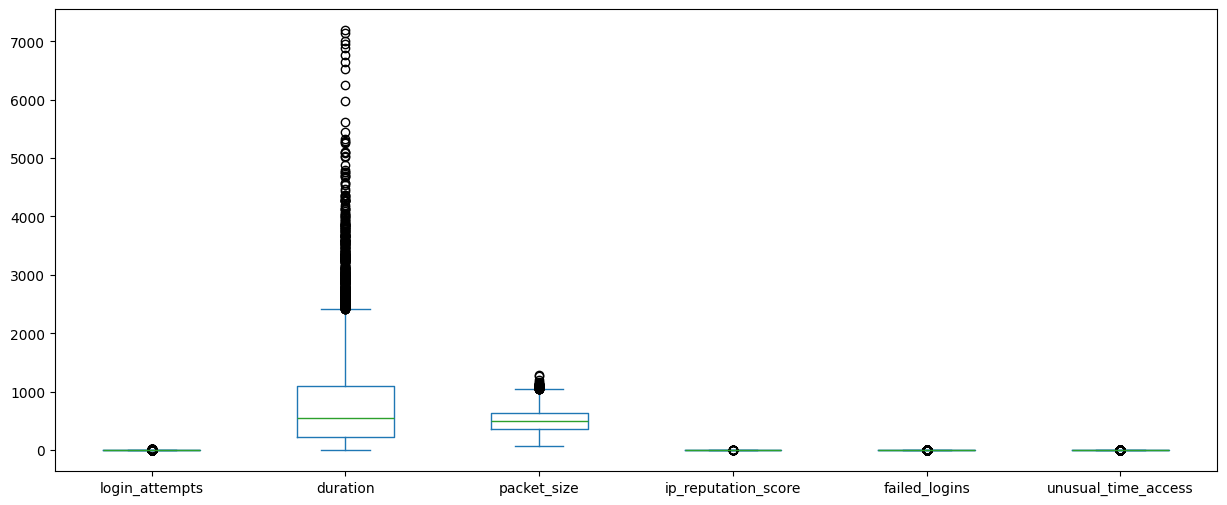

In [94]:
# Visualizamos la distribución de las distintas variables (BOXPLOT)

fig, ax = plt.subplots(figsize=(15,6))
df.plot(kind='box', ax=ax)

Escalamos los datos de forma que todos los valores numericos se encuentren en el rango [0;1]

<Axes: >

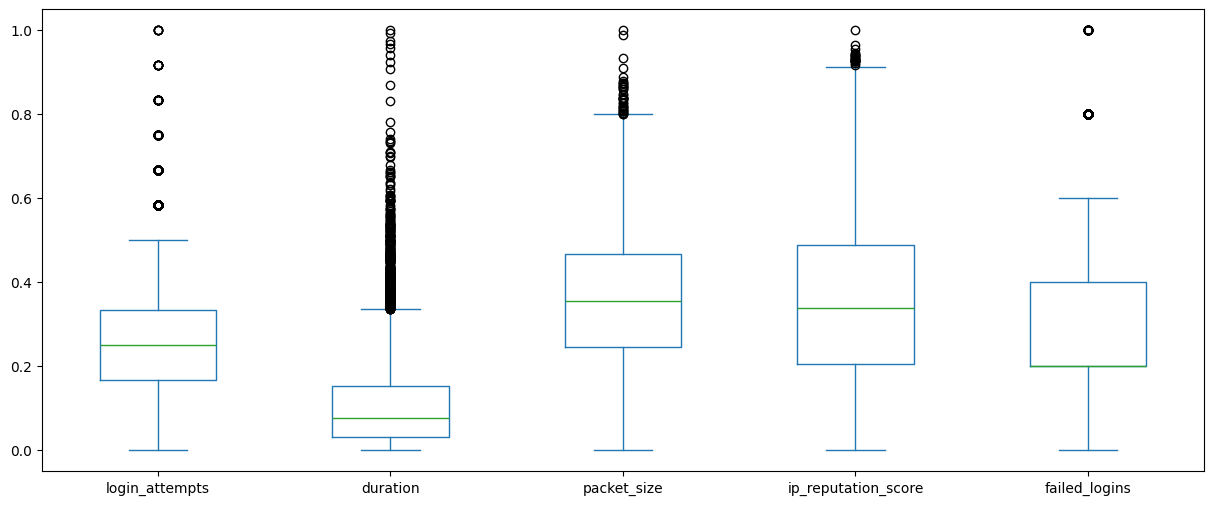

In [95]:
df_normal = df.copy()

# 'unusual_time_access' no es una variable numérica, por lo que no la normalizamos

# Aplicamos normalización a todas las columnas
columns = ['login_attempts', 'duration', 'packet_size', 'ip_reputation_score', 'failed_logins']
for column in columns:
    df_normal[column] = (df_normal[column] - df_normal[column].min()) / (df_normal[column].max() - df_normal[column].min())    
# Visualizamos la distribución de las distintas variables
fig, ax = plt.subplots(figsize=(15,6))
df_normal.loc[:,columns].plot(kind='box', ax=ax)

Los datos de las columnas duration, packet_size y ip_reputation_score claramente no siguen una distribucion normal por lo que el metodo de graficos de caja no nos da informacion util sobre los outliers. Por otro lado, login_attempts y failed_logins presentan unos pocos valores como outliers en comparacion al total de datos que vamos a analizar.

In [96]:
# determinar outliers en failed_logins
# Maximo = Q3 + 1.5 * (Q3-Q1)

maximo_failed_logins = df['failed_logins'].quantile(0.75) + 1.5 * (df['failed_logins'].quantile(0.75) - df['failed_logins'].quantile(0.25))
print("Valor maximo failed_logins: ", maximo_failed_logins)

# outliers dentro de failed logins
df_outliers = df.loc[df['failed_logins'] > maximo_failed_logins]
print("Cantidad de outliers dentro de failed_logins: ", df_outliers.shape[0])
# Cantidad de ataques dentro de los outliers
print("Cantidad de ataques dentro de los outliers: ", df_outliers.loc[df_outliers['attack'] == 'Y'].shape[0])

Valor maximo failed_logins:  3.5
Cantidad de outliers dentro de failed_logins:  323
Cantidad de ataques dentro de los outliers:  323


In [97]:
# determinar outliers en login_attempts
# Maximo = Q3 + 1.5 * (Q3-Q1)

maximo_login_attempts = df['login_attempts'].quantile(0.75) + 1.5 * (df['login_attempts'].quantile(0.75) - df['login_attempts'].quantile(0.25))
print("Valor maximo login_attempts: ", maximo_login_attempts)

# outliers dentro de login_attempts
df_outliers = df.loc[df['login_attempts'] > maximo_login_attempts]
print("Cantidad de outliers dentro de login_attempts: ", df_outliers.shape[0])
# Cantidad de ataques dentro de los outliers
print("Cantidad de ataques dentro de los outliers: ", df_outliers.loc[df_outliers['attack'] == 'Y'].shape[0])

Valor maximo login_attempts:  8.0
Cantidad de outliers dentro de login_attempts:  202
Cantidad de ataques dentro de los outliers:  202


En ambos casos vemos que estos valores atipicos se corresponden en su totalidad con datos correspondientes a ataques. Por este motivo decidimos mantener los datos, ya que nos proveen informacion util sobre los ataques.

Continuamos utilizando los datos escalados.

In [98]:
# nuestro df ahora sera df_normal
df = df_normal

Preprocesamiento de variables categoricas

In [99]:
# Primeros 5 registros
df.head()

,protocol,browser_type,login_attempts,duration,packet_size,encryption_used,ip_reputation_score,failed_logins,unusual_time_access,attack
0,TCP,Edge,0.250000,0.068497,0.438165,DES,0.655587,0.2,0,Y
1,TCP,Firefox,0.166667,0.216623,0.334152,DES,0.324443,0.0,0,N
2,TCP,Chrome,0.166667,0.010368,0.462735,DES,0.799160,0.4,0,Y
3,UDP,Unknown,0.250000,0.083555,0.606061,DES,0.131015,0.0,0,Y
4,TCP,Firefox,0.333333,0.073998,0.318591,AES,0.056820,0.2,0,N


In [100]:
# Se codifica a 'attack' como una variable binaria
df['attack'] = df['attack'].map({'Y': 1, 'N': 0})
# Y = 1 
# N = 0

In [101]:
# Se utiliza una codificacion one-hot para las variables categoricas
df = pd.get_dummies(df, columns=['browser_type'], dtype=int)
df = pd.get_dummies(df, columns=['encryption_used'], dtype=int)
df = pd.get_dummies(df, columns=['protocol'], dtype=int)

In [102]:
# Se revisan los cambios hechos
df.head()

,login_attempts,duration,packet_size,ip_reputation_score,failed_logins,unusual_time_access,attack,browser_type_Chrome,browser_type_Edge,browser_type_Firefox,browser_type_Safari,browser_type_Unknown,encryption_used_AES,encryption_used_DES,protocol_ICMP,protocol_TCP,protocol_UDP
0,0.250000,0.068497,0.438165,0.655587,0.2,0,1,0,1,0,0,0,0,1,0,1,0
1,0.166667,0.216623,0.334152,0.324443,0.0,0,0,0,0,1,0,0,0,1,0,1,0
2,0.166667,0.010368,0.462735,0.799160,0.4,0,1,1,0,0,0,0,0,1,0,1,0
3,0.250000,0.083555,0.606061,0.131015,0.0,0,1,0,0,0,0,1,0,1,0,0,1
4,0.333333,0.073998,0.318591,0.056820,0.2,0,0,0,0,1,0,0,1,0,0,1,0


In [103]:
# Calculamos la matriz de correlacion
corr = df.corr(numeric_only=True).abs()

In [104]:
# Calculamos el promedio de correlacion entre las variables de cada columna
column_mean = corr.mean(axis=1)
column_mean

login_attempts          0.081496
duration                0.069045
packet_size             0.068573
ip_reputation_score     0.079104
failed_logins           0.086501
unusual_time_access     0.063703
attack                  0.126991
browser_type_Chrome     0.154497
browser_type_Edge       0.115159
browser_type_Firefox    0.121792
browser_type_Safari     0.095220
browser_type_Unknown    0.103995
encryption_used_AES     0.123313
encryption_used_DES     0.123313
protocol_ICMP           0.095422
protocol_TCP            0.140395
protocol_UDP            0.127801
dtype: float64

In [105]:
# Vemos la correlacion entre las variables numericas
corr_sliced = corr.iloc[0:7, 0:7]
corr_sliced

,login_attempts,duration,packet_size,ip_reputation_score,failed_logins,unusual_time_access,attack
login_attempts,1.000000,0.008463,0.001300,0.002887,0.014464,0.008696,0.274903
duration,0.008463,1.000000,0.021650,0.005077,0.019375,0.012930,0.041602
packet_size,0.001300,0.021650,1.000000,0.002320,0.011676,0.001255,0.006798
ip_reputation_score,0.002887,0.005077,0.002320,1.000000,0.015613,0.003146,0.211540
failed_logins,0.014464,0.019375,0.011676,0.015613,1.000000,0.006131,0.363726
unusual_time_access,0.008696,0.012930,0.001255,0.003146,0.006131,1.000000,0.008652
attack,0.274903,0.041602,0.006798,0.211540,0.363726,0.008652,1.000000


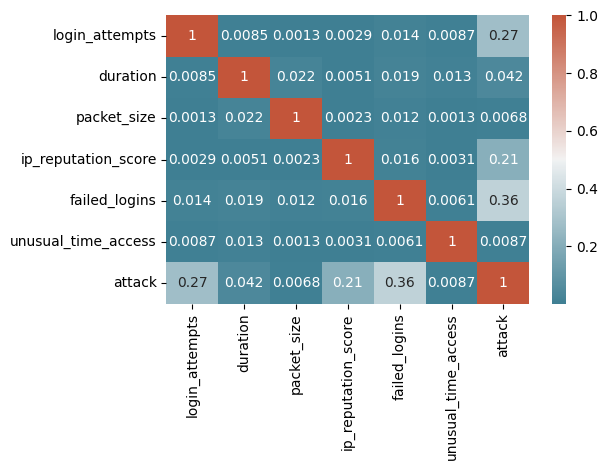

In [106]:
# Matriz de correlacion
sns.heatmap(corr_sliced, xticklabels=corr_sliced.columns, yticklabels=corr_sliced.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.tight_layout()

## Balanceo de clases

In [107]:
# Separacion del conjunto en entradas y salidas
Y = df["attack"]
X = df.drop(columns=['attack'])
Y

0       1
1       0
2       1
3       1
4       0
       ..
7422    1
7423    0
7424    0
7425    0
7426    1
Name: attack, Length: 9537, dtype: int64

In [108]:
from imblearn.over_sampling import RandomOverSampler

<Axes: xlabel='attack', ylabel='count'>

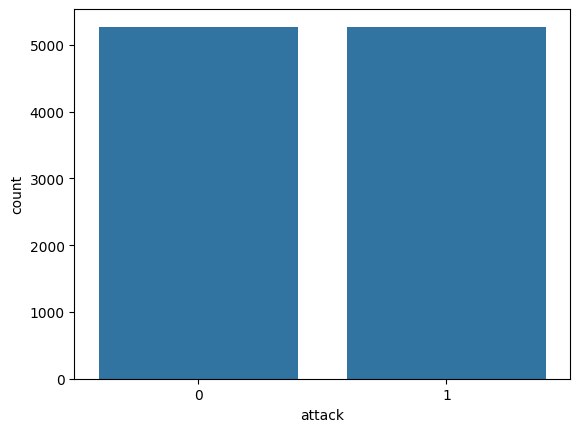

In [109]:
# Hacemos el sampling de la clase minoritaria
# Se utiliza la libreria imblearn para hacer el oversampling

oversample = RandomOverSampler(sampling_strategy='minority')

X_over, Y_over = oversample.fit_resample(X, Y)
sns.countplot(x=Y_over)

Division de los datos en conjuntos de entrenamiento y de testing.

In [110]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score

In [111]:
# Se divide el conjunto de datos en un conjunto de entrenamiento y un conjunto de prueba
# Se utiliza el 70% de los datos para entrenamiento y el 30% para prueba
X_train, X_test, Y_train, Y_test = train_test_split(X_over, Y_over, test_size=0.3)

Ajuste del modelo a los datos de entrenamiento.

In [112]:
X_train.head

<bound method NDFrame.head of       login_attempts  duration  packet_size  ip_reputation_score  \
3399        0.000000  0.014779     0.290745             0.060618   
1772        0.250000  0.104392     0.254709             0.339462   
4580        0.250000  0.004969     0.390663             0.451572   
3191        0.166667  0.002120     0.473382             0.486394   
942         0.166667  0.074192     0.463554             0.238274   
...              ...       ...          ...                  ...   
4565        0.416667  0.313973     0.262899             0.511984   
8058        0.166667  0.066487     0.386568             0.707729   
783         0.333333  0.146686     0.457002             0.049287   
2514        0.083333  0.046943     0.335790             0.526169   
8323        0.166667  0.043897     0.625717             0.103906   

      failed_logins  unusual_time_access  browser_type_Chrome  \
3399            0.4                    1                    1   
1772            0.0    

## Logistic Regression

In [113]:
# Entrenar el modelo de regresion logistica
model = LogisticRegression(verbose=2, max_iter=1000, C=0.7, penalty='l2', solver='liblinear')
model.fit(X_train, Y_train)

[LibLinear]

LogisticRegression(C=0.7, max_iter=1000, solver='liblinear', verbose=2)

Presicion del modelo para predecir las salidas al conjunto de entrenamiento.

In [114]:
# Medidas de accuracy y precision para el conjunto de entrenamiento
X_train_prediction = model.predict(X_train)
train_accuracy = accuracy_score(X_train_prediction, Y_train)
train_f1 = f1_score(X_train_prediction, Y_train)
print('Accuracy para los datos de entrenamiento : ', train_accuracy)
print('Precision para los datos de entrenamiento : ', train_f1)

Accuracy para los datos de entrenamiento :  0.7305608236250338
Precision para los datos de entrenamiento :  0.7274969173859432


Presicion del modelo para predecir las salidas al conjunto de testing.

In [115]:
# Medidas de accuracy y precision para el conjunto de test
X_test_prediction = model.predict(X_test)
test_accuracy = accuracy_score(X_test_prediction, Y_test)
test_f1 = f1_score(X_test_prediction, Y_test)
print('Accuracy para los datos de testing : ', test_accuracy)
print('Precision para los datos de testing : ', test_f1)

Accuracy para los datos de testing :  0.7269279393173198
Precision para los datos de testing :  0.729153605015674


## Naive Bayes

In [116]:
# Entrenar el modelo de Naive Bayes
model_NB = GaussianNB()
model_NB.fit(X_train, Y_train)

GaussianNB()

In [117]:
# Medidas de accuracy y precision para el conjunto de entrenamiento
X_train_prediction = model_NB.predict(X_train)
train_accuracy = accuracy_score(X_train_prediction, Y_train)
train_f1 = f1_score(X_train_prediction, Y_train)
print('Accuracy para los datos de entrenamiento : ', train_accuracy)
print('Precision para los datos de entrenamiento : ', train_f1)

Accuracy para los datos de entrenamiento :  0.8111622866431861
Precision para los datos de entrenamiento :  0.7867849495258489


In [118]:
# Calculando la precisión para el conjunto de test
X_test_prediction = model_NB.predict(X_test)
test_accuracy = accuracy_score(X_test_prediction, Y_test)
test_f1 = f1_score(X_test_prediction, Y_test)
print('Accuracy para los datos de testing : ', test_accuracy)
print('Precision para los datos de testing : ', test_f1)

Accuracy para los datos de testing :  0.8103666245259166
Precision para los datos de testing :  0.790356394129979


## K - vecinos cercanos

In [119]:
# Entrenar el modelo de KNN
model_KNN = KNeighborsClassifier(n_neighbors=5, algorithm='auto')
model_KNN.fit(X_train, Y_train)

KNeighborsClassifier()

In [120]:
# Calculando la precisión para el conjunto de entrenamiento
X_train_prediction = model_KNN.predict(X_train)
train_accuracy = accuracy_score(X_train_prediction, Y_train)
train_f1 = f1_score(X_train_prediction, Y_train)
print('Accuracy para los datos de entrenamiento : ', train_accuracy)
print('Precision para los datos de entrenamiento : ', train_f1)

Accuracy para los datos de entrenamiento :  0.8615551341099973
Precision para los datos de entrenamiento :  0.8511939429237041


In [121]:
# Calculando la precisión para el conjunto de test
X_test_prediction = model_KNN.predict(X_test)
test_accuracy = accuracy_score(X_test_prediction, Y_test)
test_f1 = f1_score(X_test_prediction, Y_test)
print('Accuracy para los datos de testing : ', test_accuracy)
print('Precision para los datos de testing : ', test_f1)

Accuracy para los datos de testing :  0.7945638432364096
Precision para los datos de testing :  0.7796610169491526


## Arbol de Decision

In [122]:
# Entrenar el modelo de arbol de decision
model_tree = DecisionTreeClassifier(max_features=5, max_depth=10)
model_tree.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=10, max_features=5)

In [123]:
# Calculando la precisión para el conjunto de entrenamiento
X_train_prediction = model_tree.predict(X_train)
train_accuracy = accuracy_score(X_train_prediction, Y_train)
train_f1 = f1_score(X_train_prediction, Y_train)
print('Accuracy para los datos de entrenamiento : ', train_accuracy)
print('Precision para los datos de entrenamiento : ', train_f1)

Accuracy para los datos de entrenamiento :  0.8772690327824438
Precision para los datos de entrenamiento :  0.8608722358722358


In [124]:
# Calculando la precisión para el conjunto de test
X_test_prediction = model_tree.predict(X_test)
test_accuracy = accuracy_score(X_test_prediction, Y_test)
test_f1 = f1_score(X_test_prediction, Y_test)
print('Accuracy para los datos de testing : ', test_accuracy)
print('Precision para los datos de testing : ', test_f1)

Accuracy para los datos de testing :  0.8637800252844501
Precision para los datos de testing :  0.8486125746399719


In [125]:
from sklearn.metrics import classification_report, confusion_matrix
report = classification_report(X_train_prediction, Y_train)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.81      0.89      4545
           1       0.76      0.99      0.86      2837

    accuracy                           0.88      7382
   macro avg       0.88      0.90      0.88      7382
weighted avg       0.90      0.88      0.88      7382



In [126]:
report = classification_report(X_test_prediction, Y_test)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.80      0.88      1915
           1       0.76      0.97      0.85      1249

    accuracy                           0.86      3164
   macro avg       0.86      0.88      0.86      3164
weighted avg       0.89      0.86      0.87      3164



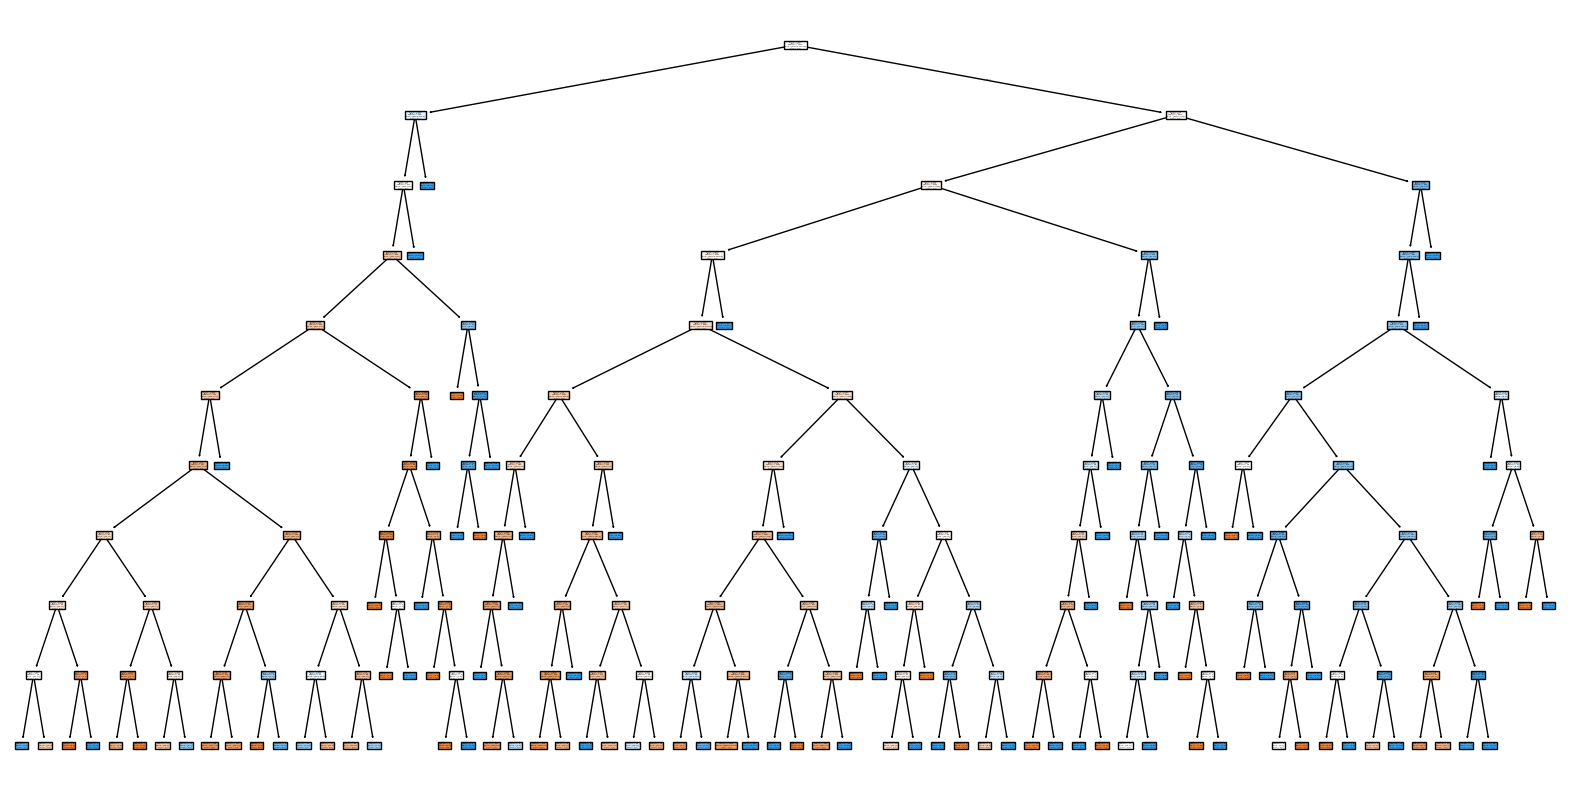

In [127]:
# Mostrar el arbol
fig = plt.figure(figsize=(20, 10))
tree.plot_tree(model_tree, filled=True, class_names=True)
plt.show()

## Ensamblados

In [128]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [129]:
# Entrenar el modelo de random forest
model_RF = RandomForestClassifier(n_estimators=100, max_features=6, max_depth=10)
model_RF.fit(X_train, Y_train)

RandomForestClassifier(max_depth=10, max_features=6)

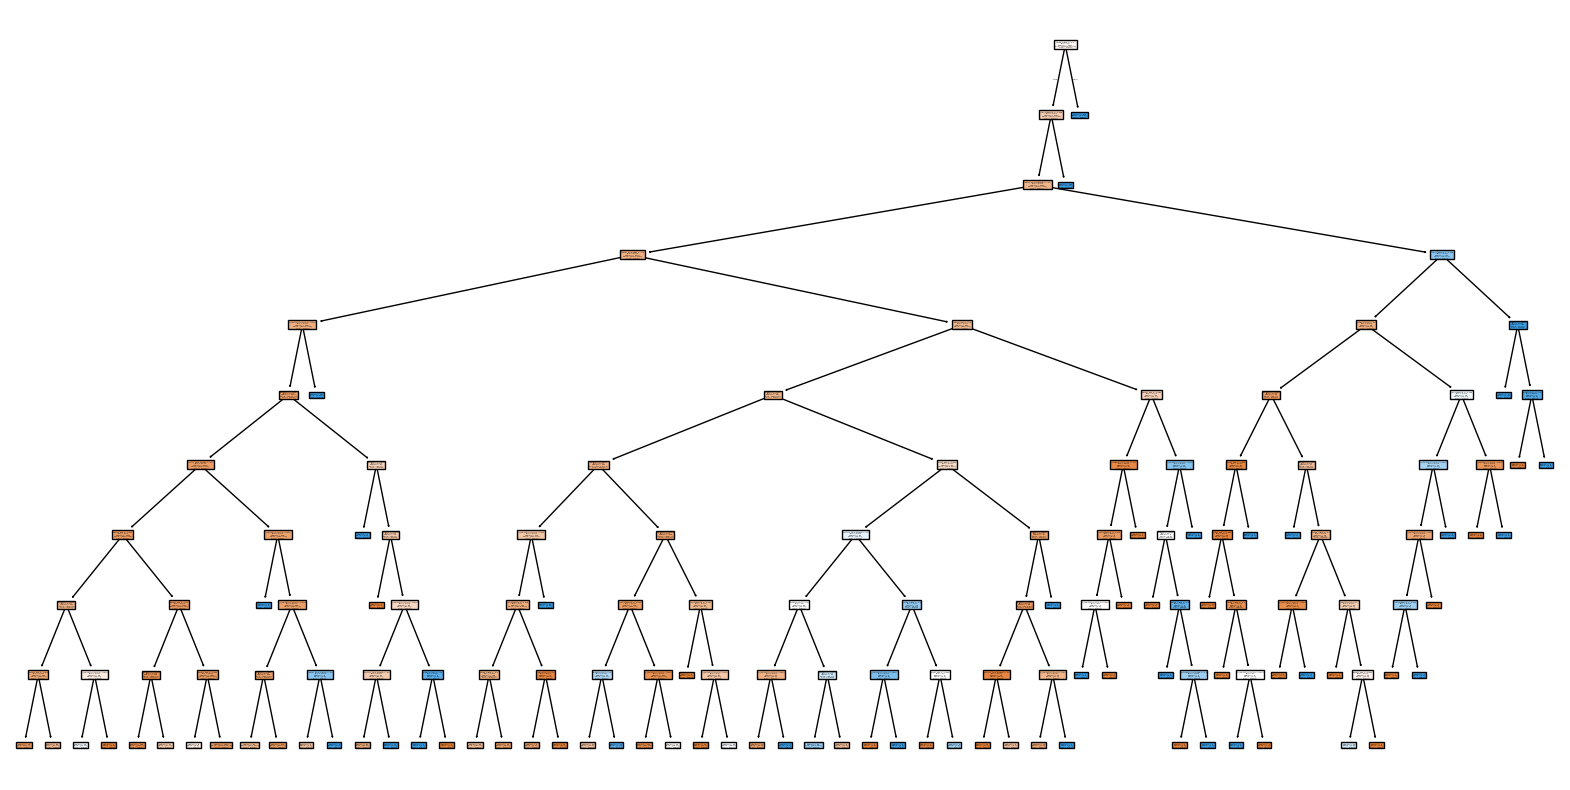

In [130]:
# Se visualiza uno de los arboles

arbol_0 = model_RF.estimators_[99]

from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(arbol_0, 
          filled=True, 
          feature_names=X.columns,
          class_names=["Clase 0", "Clase 1"])
plt.show()

In [131]:
# Evaluación del modelo
dt_train_score, dt_test_score = model_RF.score(X_train, Y_train), model_RF.score(X_test, Y_test)
print(f"Train Score: {dt_train_score}")
print(f"Test Score: {dt_test_score}")

Train Score: 0.884584123543755
Test Score: 0.8811630847029077


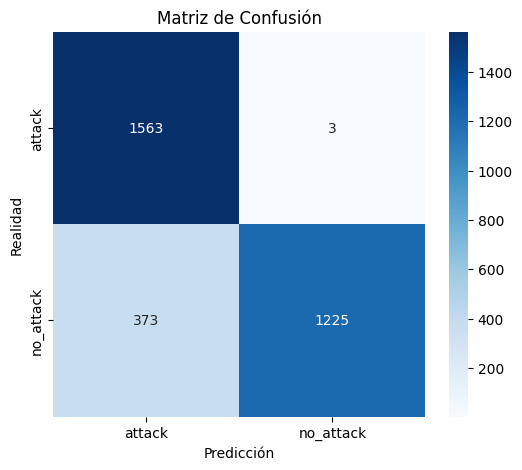

In [132]:
# Matriz de confusión
y_pred_bagging = model_RF.predict(X_test)
cm = confusion_matrix(Y_test, y_pred_bagging)

# Mostrar la matriz de confusión como un gráfico
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['attack', 'no_attack'], yticklabels=['attack', 'no_attack'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()

In [133]:
# Reporte de clasificación (precision, recall, f1-score)
report = classification_report(Y_test, y_pred_bagging)
print("\nReporte de clasificación:")
print(report)


Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.81      1.00      0.89      1566
           1       1.00      0.77      0.87      1598

    accuracy                           0.88      3164
   macro avg       0.90      0.88      0.88      3164
weighted avg       0.90      0.88      0.88      3164



## Bagging

In [134]:
# Entrenar el modelo de baggin con una regresion logistica

lr_model = LogisticRegression(max_iter=1000)

bagging_model = BaggingClassifier(estimator=lr_model, n_estimators=100, max_features=6)
bagging_model.fit(X_train, Y_train)

BaggingClassifier(estimator=LogisticRegression(max_iter=1000), max_features=6,
                  n_estimators=100)

In [135]:
# Evaluación del modelo
dt_train_score, dt_test_score = bagging_model.score(X_train, Y_train), bagging_model.score(X_test, Y_test)
print(f"Train Score: {dt_train_score}")
print(f"Test Score: {dt_test_score}")

Train Score: 0.72879978325657
Test Score: 0.7199747155499368


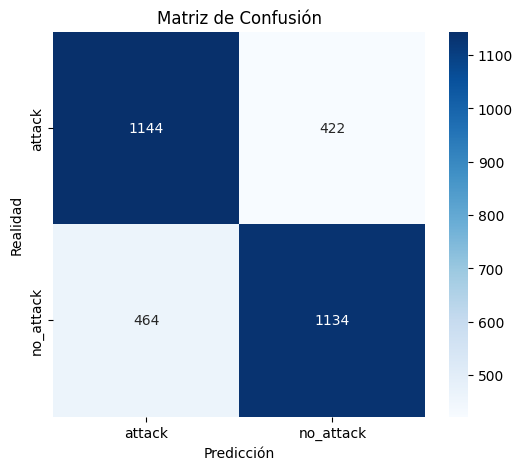

In [136]:
# Matriz de confusión
y_pred_bagging = bagging_model.predict(X_test)
cm = confusion_matrix(Y_test, y_pred_bagging)

# Mostrar la matriz de confusión como un gráfico
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['attack', 'no_attack'], yticklabels=['attack', 'no_attack'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()

In [137]:
# Reporte de clasificación (precision, recall, f1-score)
report = classification_report(Y_test, y_pred_bagging)
print("\nReporte de clasificación:")
print(report)


Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.71      0.73      0.72      1566
           1       0.73      0.71      0.72      1598

    accuracy                           0.72      3164
   macro avg       0.72      0.72      0.72      3164
weighted avg       0.72      0.72      0.72      3164

